# Flight Delays and Cancellations
Dataset link <https://www.kaggle.com/usdot/flight-delays>

### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/utkarsh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv',nrows=1163815)

Due to memory limitations,I have read only 1/5th of the flights.csv file.Total no of rows are $5819078$.

In [4]:
#Airlines
airlines.shape[0] #no of rows=14
airlines.shape[1] #no of columns=2
airlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


In [5]:
#Airports
airports.shape[0] #no of rows=322
airports.shape[1] #no of columns=7
airports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


In [6]:
flights.shape[0] #no of rows = 1163815
flights.shape[1] #no of columns = 31
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flights.info()
# The result suggests that columns like CANCELLATION REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,etc have a lot of missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163815 entries, 0 to 1163814
Data columns (total 31 columns):
YEAR                   1163815 non-null int64
MONTH                  1163815 non-null int64
DAY                    1163815 non-null int64
DAY_OF_WEEK            1163815 non-null int64
AIRLINE                1163815 non-null object
FLIGHT_NUMBER          1163815 non-null int64
TAIL_NUMBER            1155951 non-null object
ORIGIN_AIRPORT         1163815 non-null object
DESTINATION_AIRPORT    1163815 non-null object
SCHEDULED_DEPARTURE    1163815 non-null int64
DEPARTURE_TIME         1123724 non-null float64
DEPARTURE_DELAY        1123724 non-null float64
TAXI_OUT               1122977 non-null float64
WHEELS_OFF             1122977 non-null float64
SCHEDULED_TIME         1163813 non-null float64
ELAPSED_TIME           1119898 non-null float64
AIR_TIME               1119898 non-null float64
DISTANCE               1163815 non-null int64
WHEELS_ON              1121859 non-null f

## Some important data definitions and relationships are mentioned below.
### Data Definition
*  AIR_TIME - The time duration between wheels_off and wheels_on time.
*  WHEELS_OFF Time - The time point that the aircraft's wheels leave the ground.
*  WHEELS_ON Time - The time point that the aircraft's wheels touch on the ground.
*  TAXI_OUT Time - The time duration elapsed between departure from the origin airport gate and wheels off.
*  TAXI_IN Time - The time duration elapsed between wheels-on and gate arrival at the destination airport.

### Data Relationship
*  departure_time = wheels_off - taxi_out
*  departure_delay = departure_time - scheduled_departure
*  arrival_time = wheels_on + taxi_in
*  arrival_delay = arrival_time - scheduled_arrival
*  elapsed_time =air_time + taxi_in + taxi_out
*  air_time = wheels_on - wheels_off

### We can check the relationships from the following table.

In [8]:
flights[['ELAPSED_TIME','TAXI_IN','AIR_TIME','TAXI_OUT','ARRIVAL_TIME','WHEELS_ON','WHEELS_OFF','ARRIVAL_DELAY','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_TIME','SCHEDULED_ARRIVAL','SCHEDULED_DEPARTURE']][0:5]

,ELAPSED_TIME,TAXI_IN,AIR_TIME,TAXI_OUT,ARRIVAL_TIME,WHEELS_ON,WHEELS_OFF,ARRIVAL_DELAY,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE
0,194.0,4.0,169.0,21.0,408.0,404.0,15.0,-22.0,2354.0,-11.0,205.0,430,5
1,279.0,4.0,263.0,12.0,741.0,737.0,14.0,-9.0,2.0,-8.0,280.0,750,10
2,293.0,11.0,266.0,16.0,811.0,800.0,34.0,5.0,18.0,-2.0,286.0,806,20
3,281.0,8.0,258.0,15.0,756.0,748.0,30.0,-9.0,15.0,-5.0,285.0,805,20
4,215.0,5.0,199.0,11.0,259.0,254.0,35.0,-21.0,24.0,-1.0,235.0,320,25


### We can also note the following from the above table.
##### The following times are in the xx:yy - hour:minute format (e.g. 2354 means 11:54pm, 5 means 00:05 am)
scheduled_departure,   departure_time,    scheduled_arrival,    arrival_time,    wheels_off,    wheels_on
##### And the following times are in minutes format (negatives mean actual_time is ahead of scheduled_time for the absolute value of that negative number)
arrival_delay,    departure_delay,    taxi_in,    taxi_out,    scheduled_time,    elapsed_time,    air_time

### Now,let's add some features of our own.

In [9]:
flights.YEAR.unique() #This implies that the data we are dealing with is of 2015 only.
#Check the column DAY_OF_WEEK which is 4 for january 1,2015.In India,the fourth day of the week is Thursday.
#Let's add some description columns for the same.

array([2015])

In [10]:
day_of_week_desc={
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday',
    7:'Sunday'
}
flights['DESC_DOW']=flights['DAY_OF_WEEK'].apply(lambda a:day_of_week_desc[a])
flights.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DESC_DOW
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday


In [11]:
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
airport_dict = dict(zip(airports['IATA_CODE'],airports['AIRPORT']))
flights['DESC_AIRLINE'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
# flights.head()

A lot of airlines activity is given and the first question that pops up in our head is 
'Which airlines is the best?'
So,let's create a ranking module for airlines.We will store the relevant information throughout the process.<br>
Following are the factors that decide the rank of an airline.
* Highest Ratio of (Operated flights)/(Scheduled flights)
* Flight speed
* Average arrival delay
* Flight volume
* Taxi In and Out Time

I have not included avg. departure delay because usually it depends on the departure airport.
###### Let's calculate the ratio of operated flights/scheduled flights for each airlines.

In [12]:
# flights.CANCELLED.unique() #0,1
#Each airline is either cancelled or operated.
rank_airlines = pd.DataFrame(flights.groupby('DESC_AIRLINE').count()['SCHEDULED_DEPARTURE'])
rank_airlines['CANCELLED']=flights.groupby('DESC_AIRLINE').sum()['CANCELLED']
rank_airlines['OPERATED']=rank_airlines['SCHEDULED_DEPARTURE']-rank_airlines['CANCELLED']
rank_airlines['RATIO_OP_SCH']=rank_airlines['OPERATED']/rank_airlines['SCHEDULED_DEPARTURE']
rank_airlines.drop(rank_airlines.columns[[0,1,2]],axis=1,inplace=True)
rank_airlines.head()

,RATIO_OP_SCH
DESC_AIRLINE,
Alaska Airlines Inc.,0.993679
American Airlines Inc.,0.956184
American Eagle Airlines Inc.,0.891348
Atlantic Southeast Airlines,0.948191
Delta Air Lines Inc.,0.982541


/home/utkarsh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


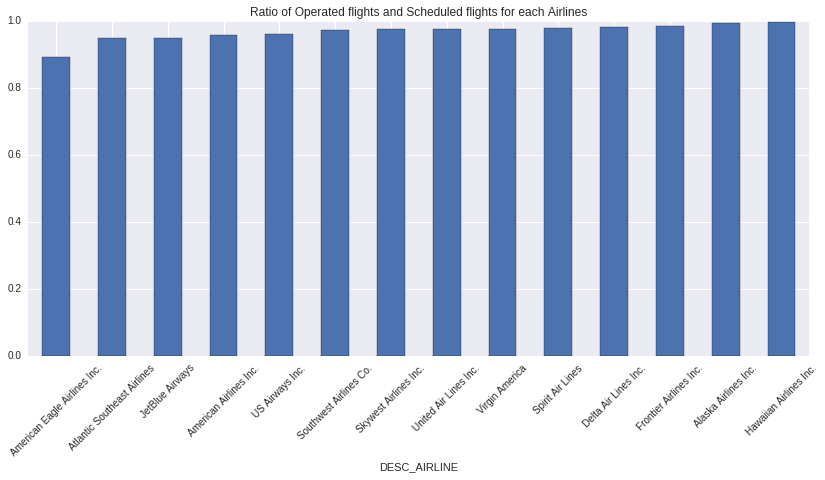

In [13]:
rank_airlines.sort(['RATIO_OP_SCH'],ascending = 1,inplace=True)
# rank_airlines.head()
rank_airlines['RATIO_OP_SCH'].plot(kind='bar',figsize=(14,6),rot=45)
plt.title('Ratio of Operated flights and Scheduled flights for each Airlines')

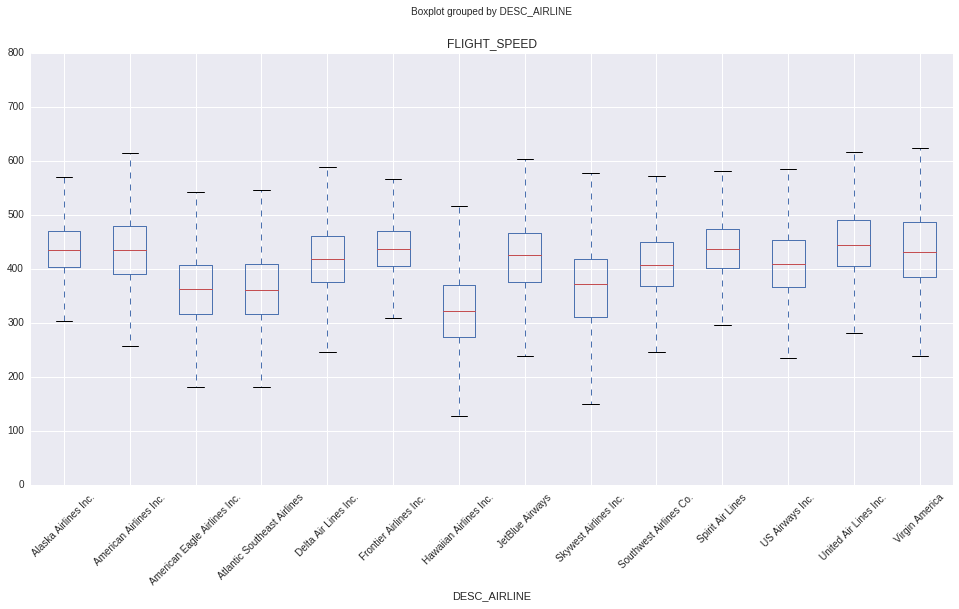

In [14]:
flights['FLIGHT_SPEED'] = 60*flights['DISTANCE']/flights['AIR_TIME']
rank_airlines['FLIGHT_SPEED'] = flights.groupby('DESC_AIRLINE')['FLIGHT_SPEED'].mean()
# flights.groupby('DESC_AIRLINE')['FLIGHT_SPEED'].mean()
flights[['DESC_AIRLINE','FLIGHT_SPEED']].boxplot(column = 'FLIGHT_SPEED',by='DESC_AIRLINE',figsize=(16,8),rot=45)
# flights.groupby('DESC_AIRLINE')['FLIGHT_SPEED'].mean().plot(kind='box',figsize=(16,8),subplots=True,legend=True)
# plt.title('Density plot of flight speed')
# plt.xlabel('Speed in miles/hour')

The plot clearly shows that almost all the flights of any airline run at the speed of 350-450 miles/hour.
We have also added this information in our ranking module dataframe for future reference.

In [15]:
rank_airlines.head()

,RATIO_OP_SCH,FLIGHT_SPEED
DESC_AIRLINE,,
American Eagle Airlines Inc.,0.891348,361.399800
Atlantic Southeast Airlines,0.948191,362.211990
JetBlue Airways,0.949303,416.897288
American Airlines Inc.,0.956184,431.353523
US Airways Inc.,0.961097,408.499482


### Now, let's find the average delay for a particular airline. Both arrival delay and departure delay are in minutes.

In [16]:
flights.groupby('DESC_AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean()
#Let's add arrival delay to our ranking module as well.
rank_airlines['ARRIVAL_DELAY']= flights.groupby('DESC_AIRLINE')['ARRIVAL_DELAY'].mean()
#As our flight speed is in miles/hour,it's probably best to keep ARRIVAL DELAY in hours.
rank_airlines['ARRIVAL_DELAY']=rank_airlines['ARRIVAL_DELAY'].apply(lambda x:x/60)
rank_airlines.head()

,RATIO_OP_SCH,FLIGHT_SPEED,ARRIVAL_DELAY
DESC_AIRLINE,,,
American Eagle Airlines Inc.,0.891348,361.399800,0.313304
Atlantic Southeast Airlines,0.948191,362.211990,0.159790
JetBlue Airways,0.949303,416.897288,0.211907
American Airlines Inc.,0.956184,431.353523,0.128825
US Airways Inc.,0.961097,408.499482,0.083134


Meanwhile,let's take a look at the plot of arrival and departure delay for better understanding about airlines and airports.

/home/utkarsh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


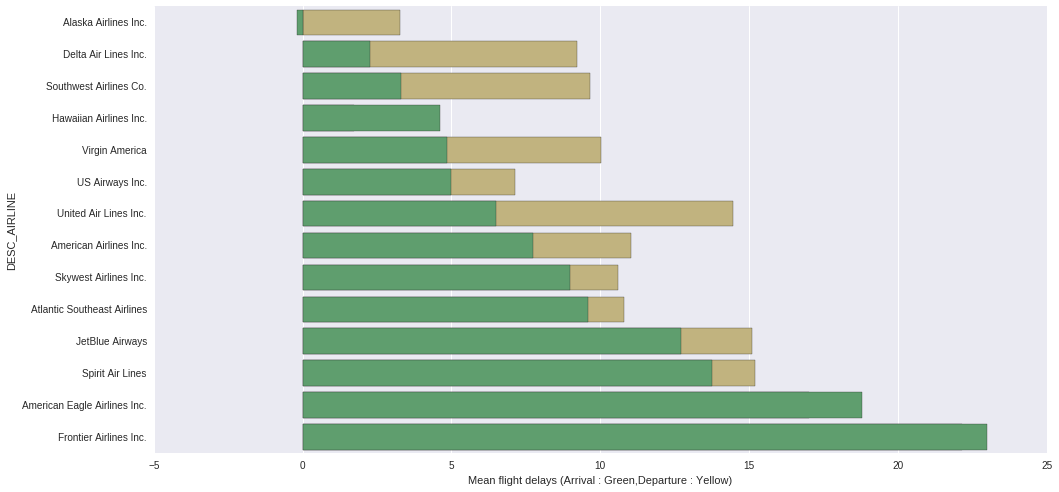

In [17]:
df_delay = pd.DataFrame(flights.groupby('DESC_AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean())
df_delay.sort(['ARRIVAL_DELAY','DEPARTURE_DELAY'],ascending = [1,1],inplace=True)
plt.figure(figsize=(16, 8))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='DEPARTURE_DELAY',y=df_delay.index,data = df_delay,color = 'y')
plot = sns.barplot(x='ARRIVAL_DELAY',y=df_delay.index,data = df_delay,color = 'g')
plot.set(xlabel='Mean flight delays (Arrival : Green,Departure : Yellow)')

As we can see, almost all the airlines have arrival delays greater than departure delays, which is logical as the departure delays are mostly due to late arrival, security reasons etc. Departure delays mostly depend upon the airport. We can keep this in mind while creating the module for ranking of airports.<br>
*One **important** thing to note is that Alaska Airlines has a negative arrival delay which means it arrives before scheduled time on an average.*

Now,let's look at the flight volume of each airline.

In [18]:
rank_airlines['FLIGHTS_VOLUME'] = flights.groupby('DESC_AIRLINE')['FLIGHT_NUMBER'].count()
#Let's change it into ratio of flight_vol/total flight_vol
total = rank_airlines['FLIGHTS_VOLUME'].sum()
rank_airlines['FLIGHTS_VOLUME'] = rank_airlines['FLIGHTS_VOLUME'].apply(lambda x:(x/float(total)))
rank_airlines.head()

,RATIO_OP_SCH,FLIGHT_SPEED,ARRIVAL_DELAY,FLIGHTS_VOLUME
DESC_AIRLINE,,,,
American Eagle Airlines Inc.,0.891348,361.399800,0.313304,0.061731
Atlantic Southeast Airlines,0.948191,362.211990,0.159790,0.106225
JetBlue Airways,0.949303,416.897288,0.211907,0.045778
American Airlines Inc.,0.956184,431.353523,0.128825,0.092815
US Airways Inc.,0.961097,408.499482,0.083134,0.070302


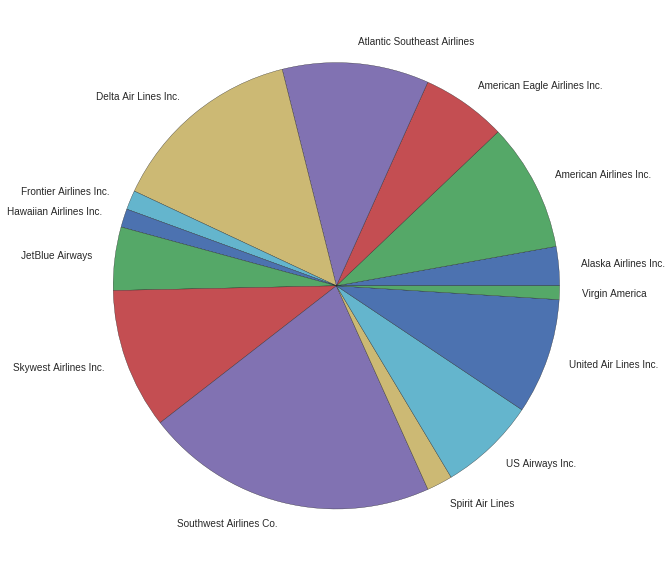

In [19]:
flights.groupby('DESC_AIRLINE')['FLIGHT_NUMBER'].count().plot.pie(figsize=(10,10),rot=45)
plt.ylabel('')

Now,let's consider taxi in and out time as well.<br>
**TAXI_OUT Time** - The time duration elapsed between departure from the origin airport gate and wheels off.<br>
**TAXI_IN Time** - The time duration elapsed between wheels-on and gate arrival at the destination airport.

In [20]:
rank_airlines[['TAXI_IN','TAXI_OUT']] = flights.groupby('DESC_AIRLINE')[['TAXI_IN','TAXI_OUT']].mean()
#Taxi in and out time are in minutes.Let's change them to hours.
# rank_airlines[['TAXI_IN','TAXI_OUT']] = rank_airlines[['TAXI_IN','TAXI_OUT']].apply(lambda x, y : (x/float(60),y/float(60)))
rank_airlines['TAXI_IN'] = rank_airlines['TAXI_IN'].apply(lambda x:(x/float(60)))
rank_airlines['TAXI_OUT'] = rank_airlines['TAXI_OUT'].apply(lambda x:(x/float(60)))
rank_airlines.head()

,RATIO_OP_SCH,FLIGHT_SPEED,ARRIVAL_DELAY,FLIGHTS_VOLUME,TAXI_IN,TAXI_OUT
DESC_AIRLINE,,,,,,
American Eagle Airlines Inc.,0.891348,361.399800,0.313304,0.061731,0.172513,0.296456
Atlantic Southeast Airlines,0.948191,362.211990,0.159790,0.106225,0.128935,0.288066
JetBlue Airways,0.949303,416.897288,0.211907,0.045778,0.107482,0.313940
American Airlines Inc.,0.956184,431.353523,0.128825,0.092815,0.151267,0.286410
US Airways Inc.,0.961097,408.499482,0.083134,0.070302,0.124965,0.323354


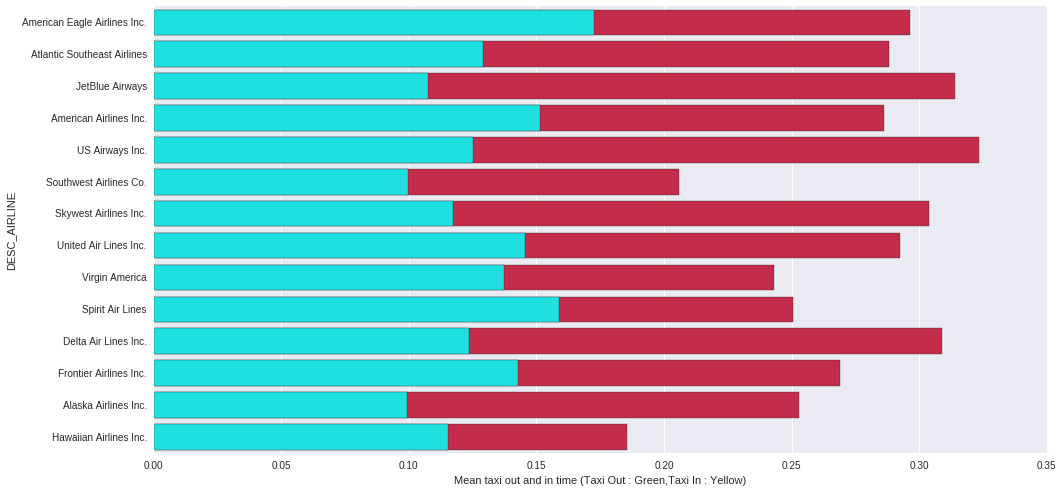

In [21]:
plt.figure(figsize=(16, 8))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='TAXI_OUT',y=rank_airlines.index,data = rank_airlines,color = 'crimson')
plot = sns.barplot(x='TAXI_IN',y=rank_airlines.index,data = rank_airlines,color = 'cyan')
plot.set(xlabel='Mean taxi out and in time (Taxi Out : Green,Taxi In : Yellow)')

Now,let's find the rank of a particular airline.<br>
We have 5 variables which decide a score.
The score is proportional to a subset (a) of the variables whereas being inversely proportional to a different subset (b) of the variables.<br>
The most naive way to capture this information is through the following formula.<br>

**Score_airline = a/(1+b)**, where<br>
        a = (RATIO_OP_SCH) \* (FLIGHT_SPEED) \* (FLIGHTS_VOLUME)<br>
        and <br>
        b = (ARRIVAL_DELAY) \* (TAXI_IN) \* (TAXI_OUT)<br>
        
A higher score indicates a better rank.

In [84]:
# I have scaled the data to 1-2
for i in rank_airlines.columns:
    rank_airlines[i] = ((rank_airlines[i]-rank_airlines[i].min())/(rank_airlines[i].max()-rank_airlines[i].min()))+1
a = rank_airlines.RATIO_OP_SCH*rank_airlines.FLIGHT_SPEED*rank_airlines.FLIGHTS_VOLUME
b = rank_airlines.ARRIVAL_DELAY*rank_airlines.TAXI_IN*rank_airlines.TAXI_OUT
rank_airlines['SCORE'] = a/(1+b)
rank_airlines.sort(['SCORE'],ascending=False,inplace=True)
rank_airlines.head()

/home/utkarsh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,RATIO_OP_SCH,FLIGHT_SPEED,ARRIVAL_DELAY,FLIGHTS_VOLUME,TAXI_IN,TAXI_OUT,SCORE
DESC_AIRLINE,,,,,,,
Southwest Airlines Co.,1.765798,1.667312,1.149867,2.000000,1.008668,1.147557,2.526097
Alaska Airlines Inc.,1.964054,1.881852,1.000000,1.090949,1.000000,1.489835,1.619470
Delta Air Lines Inc.,1.859127,1.735663,1.104521,1.649289,1.332188,1.894813,1.404920
United Air Lines Inc.,1.787184,2.000000,1.287446,1.365741,1.632914,1.775149,1.031655
Virgin America,1.794203,1.920500,1.216547,1.000000,1.517517,1.417649,0.952615


In our earlier plots, we noticed the highest flight volume for Southwest Airlines and negative arrival delay for Alaska Airlines. Hence, it's no surprise that these two airlines grab the top spots. 

# Insights
## Most busy day.

/home/utkarsh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


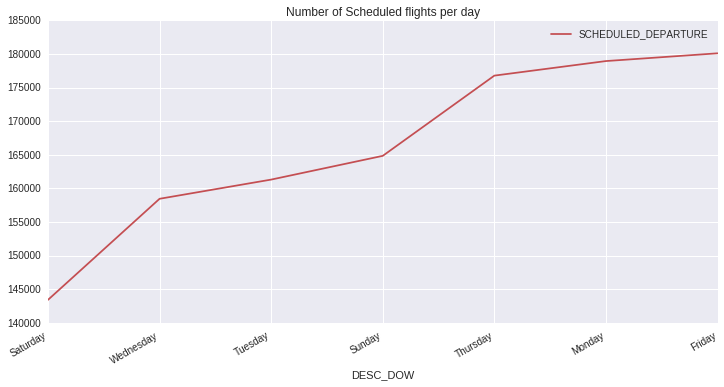

In [24]:
df_busyday = pd.DataFrame(flights.groupby('DESC_DOW').count()['SCHEDULED_DEPARTURE'])
df_busyday = df_busyday.sort(['SCHEDULED_DEPARTURE'],ascending = 1)
df_busyday.head()
df_busyday.plot(kind='line',subplots=True,c='r',figsize=(12,6),legend=True)
plt.title('Number of Scheduled flights per day')


The most busy day comes out to be FRIDAY.
One of the reasons of this outcome can be associated with Saturday and Sunday,being holidays which allows people
to travel on Friday.

## Daily flight volume of every airline

In [25]:
flight_volume_airline_day = flights.pivot_table(index="DESC_DOW",columns="DESC_AIRLINE",values="SCHEDULED_DEPARTURE",aggfunc=lambda x:x.count())
flight_volume_airline_day.head()

DESC_AIRLINE,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
DESC_DOW,,,,,,,,,,,,,,
Friday,5000,16191,10972,19595,25885,2536,2442,8029,18261,37732,3224,12860,15515,1856
Monday,4887,16151,10930,19503,25900,2569,2274,8026,18199,37954,3186,12235,15333,1797
Saturday,4606,14794,8642,13757,18786,1783,2196,7161,14818,31103,3180,10215,11103,1260
Sunday,4869,15942,10545,17119,23267,2474,2244,7959,17205,33309,3196,11650,13339,1720
Thursday,4936,16066,10851,19027,25043,2491,2283,8022,17940,37005,3168,12723,15425,1797


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text xticklabel objects>)

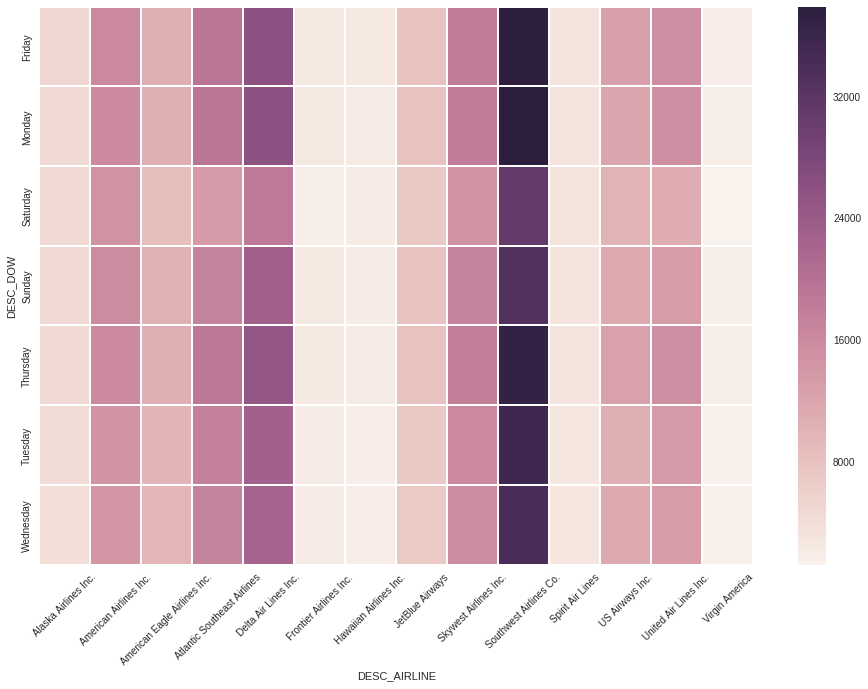

In [26]:
fig = plt.figure(figsize=(16,10))
sns.heatmap(flight_volume_airline_day, linecolor="w", linewidths=1)
plt.xticks(rotation=45)

## Trend of flight cancellations

/home/utkarsh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


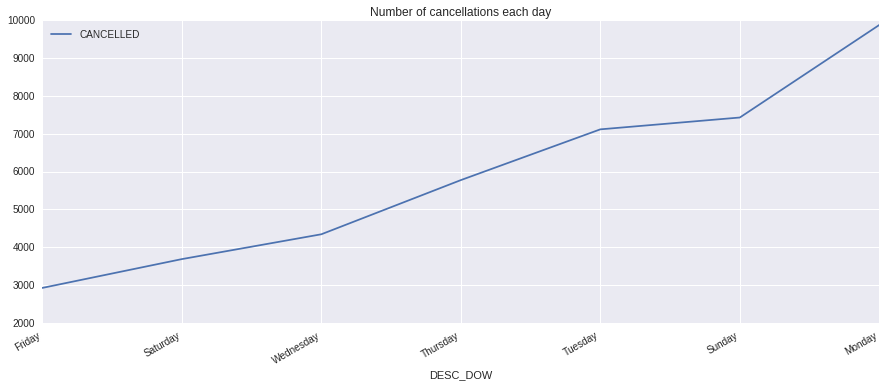

In [27]:
df_cancellations = pd.DataFrame(flights.groupby('DESC_DOW').sum()['CANCELLED'])
df_cancellations=df_cancellations.sort(['CANCELLED'],ascending =1)
df_cancellations.head()
df_cancellations.plot(kind='line',figsize=(15,6),subplots=True,legend=True)
plt.title('Number of cancellations each day')

Notice the trend on fridays and mondays.<br>
Now,let's look at the reasons for cancellation data.

In [28]:
flights.CANCELLATION_REASON.unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

    'CANCELLATION_REASON' indicates with a letter the reason for the cancellation of the flight.
     A - Carrier; B - Weather; C - National Air System; D - Security

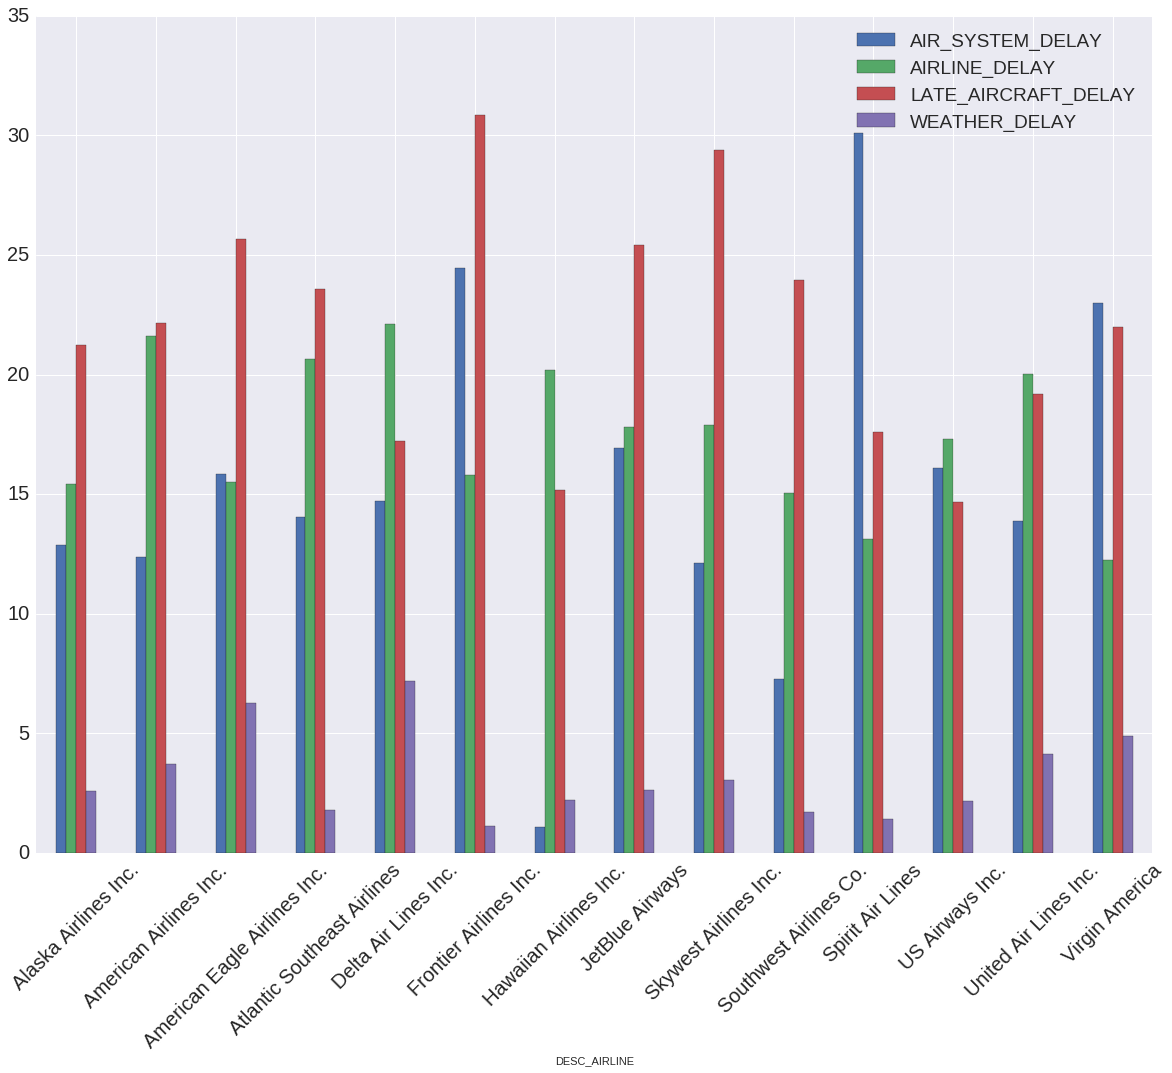

In [76]:
cancellation_reason = pd.DataFrame(flights.groupby(['DESC_AIRLINE'])['AIR_SYSTEM_DELAY', 'AIRLINE_DELAY',
                                               'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'].mean())
# flight_volume_airline_day = flights.pivot_table(index="DESC_DOW",columns="DESC_AIRLINE",values="SCHEDULED_DEPARTURE",aggfunc=lambda x:x.count())
cancellation_reason.head()
cancellation_reason.plot.bar(legend = True,figsize = (20,15),rot=45)
plt.legend(loc=1,prop={'size':19})
plt.tick_params(labelsize = 20)

### Let's create a ranking module for airports now
The factors affecting the rank of airports are following:
* Highest Ratio of (Operated flights)/(Scheduled flights)
* Number of flight delays
* Air traffic
* Traffic In and Out time

Let's calculate the ratio of Operated flights and Scheduled flights first.

In [77]:
flights['DESC_OA']=flights['ORIGIN_AIRPORT'].apply(lambda x:airport_dict[x])
flights['DESC_DA']=flights['DESTINATION_AIRPORT'].apply(lambda x:airport_dict[x])
rank_airport = pd.DataFrame(flights.groupby('DESC_OA')['SCHEDULED_DEPARTURE'].count())
rank_airport['CANCELLED']=flights.groupby('DESC_OA')['CANCELLED'].sum()
rank_airport['OPERATED']=rank_airport['SCHEDULED_DEPARTURE']-rank_airport['CANCELLED']
rank_airport['RATIO_OP_SCH']=rank_airport['OPERATED']/rank_airport['SCHEDULED_DEPARTURE']
rank_airport.drop(rank_airport.columns[[0,1,2]],axis=1,inplace=True)
rank_airport.head()

,RATIO_OP_SCH
DESC_OA,
Aberdeen Regional Airport,0.980132
Abilene Regional Airport,0.901024
Abraham Lincoln Capital Airport,0.913947
Adak Airport,0.954545
Akron-Canton Regional Airport,0.960563


Now,let's calculate the number of flight delays.I am considering only the delays in departure as I have already mentioned about departure delays happening due to airports and arrival delays due to airlines.

In [78]:
df_flights_copy = flights.copy()
df_flights_copy['DEPARTURE_DELAY'] = df_flights_copy['DEPARTURE_DELAY'].apply(lambda x: 1 if(x>0) else 0)
df_flights_copy['DEPARTURE_DELAY'].head()
rank_airport['NO_FLIGHT_DELAYS'] = df_flights_copy.groupby('DESC_OA')['DEPARTURE_DELAY'].sum()

rank_airport.head()

,RATIO_OP_SCH,NO_FLIGHT_DELAYS
DESC_OA,,
Aberdeen Regional Airport,0.980132,30
Abilene Regional Airport,0.901024,170
Abraham Lincoln Capital Airport,0.913947,91
Adak Airport,0.954545,9
Akron-Canton Regional Airport,0.960563,404


Now,let's calculate air traffic i.e. the number of flights in air heading for a particular airport.

In [79]:
rank_airport['AIR_TRAFFIC']=flights.groupby('DESC_DA')['SCHEDULED_DEPARTURE'].count()
rank_airport.head()

,RATIO_OP_SCH,NO_FLIGHT_DELAYS,AIR_TRAFFIC
DESC_OA,,,
Aberdeen Regional Airport,0.980132,30,150
Abilene Regional Airport,0.901024,170,583
Abraham Lincoln Capital Airport,0.913947,91,335
Adak Airport,0.954545,9,22
Akron-Canton Regional Airport,0.960563,404,1416


In [80]:
rank_airport['TAXI_OUT']=flights.groupby('DESC_OA')['TAXI_OUT'].mean()
rank_airport['TAXI_IN']=flights.groupby('DESC_DA')['TAXI_IN'].mean()
rank_airport.head()

,RATIO_OP_SCH,NO_FLIGHT_DELAYS,AIR_TRAFFIC,TAXI_OUT,TAXI_IN
DESC_OA,,,,,
Aberdeen Regional Airport,0.980132,30,150,16.452703,4.876712
Abilene Regional Airport,0.901024,170,583,10.147727,3.442125
Abraham Lincoln Capital Airport,0.913947,91,335,15.993506,4.257329
Adak Airport,0.954545,9,22,9.714286,4.047619
Akron-Canton Regional Airport,0.960563,404,1416,18.148827,5.111029



Again,here we can make a formula just like earlier for rank predictions.<br>
score = a/(1+b) where<br>
a = (RATIO_OP_SCH)\*(AIR_TRAFFIC) and <br>
b = (NO_FLIGHT_DELAYS)\*(TAXI_OUT)\*(TAXI_IN)

In [85]:
# I have scaled the data to 1-2
for i in rank_airport.columns:
    rank_airport[i] = ((rank_airport[i]-rank_airport[i].min())/(rank_airport[i].max()-rank_airport[i].min()))+1
a = rank_airport.RATIO_OP_SCH*rank_airport.AIR_TRAFFIC
b = rank_airport.NO_FLIGHT_DELAYS*rank_airport.TAXI_IN*rank_airport.TAXI_OUT
rank_airport['SCORE'] = a/(1+b)
rank_airport.sort(['SCORE'],ascending=False,inplace=True)
rank_airport.head()

/home/utkarsh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,RATIO_OP_SCH,NO_FLIGHT_DELAYS,AIR_TRAFFIC,TAXI_OUT,TAXI_IN,SCORE
DESC_OA,,,,,,
Canyonlands Field,1.976923,1.000234,1.001671,1.000000,1.026550,0.977026
Valdez Airport,1.906977,1.000234,1.001644,1.065454,1.000000,0.924679
Bethel Airport,1.940594,1.001805,1.002642,1.067395,1.111968,0.888842
Merle K. (Mudhole) Smith Airport,1.918919,1.000969,1.001914,1.083196,1.095979,0.878573
Valley International Airport,1.957082,1.004879,1.009380,1.136996,1.104599,0.873295


Let's tackle the third problem.
* Given the flight delays for the airports, can you predict the estimated delay for the flight ?

I am assuming that giving flight delays means we have the mean departure delay and arrival delay at all airports.
In simple terms,we know the delays on an average for any flight departing or arriving at a particular airport.

In [86]:
#Considering departure delays
OA_AIRLINE_DELAY = flights.pivot_table(index = "DESC_OA",columns = "DESC_AIRLINE",values = "DEPARTURE_DELAY",
                    aggfunc = lambda x:x.mean()).head()
#Think of it as M X N matrix where airports and airlines are rows and columns resp.
# A[i][j] represent the mean departure delay of an airline j when it departs from an airport i.
OA_AIRLINE_DELAY.head()


DESC_AIRLINE,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
DESC_OA,,,,,,,,,,,,,,
Aberdeen Regional Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.581081,NaN,NaN,NaN,NaN,NaN
Abilene Regional Airport,NaN,NaN,7.555766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abraham Lincoln Capital Airport,NaN,NaN,9.234694,NaN,NaN,NaN,NaN,NaN,10.568720,NaN,NaN,NaN,NaN,NaN
Adak Airport,1.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akron-Canton Regional Airport,NaN,NaN,NaN,9.202847,9.47,NaN,NaN,NaN,63.500000,5.302177,NaN,NaN,NaN,NaN


In [87]:
#Considering departure delays
DA_AIRLINE_DELAY = flights.pivot_table(index = "DESC_DA",columns = "DESC_AIRLINE",values = "ARRIVAL_DELAY",aggfunc = lambda x:x.mean())
DA_AIRLINE_DELAY.head()

DESC_AIRLINE,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
DESC_DA,,,,,,,,,,,,,,
Aberdeen Regional Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.173611,NaN,NaN,NaN,NaN,NaN
Abilene Regional Airport,NaN,NaN,13.075901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abraham Lincoln Capital Airport,NaN,NaN,17.836735,NaN,NaN,NaN,NaN,NaN,11.024038,NaN,NaN,NaN,NaN,NaN
Adak Airport,-8.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akron-Canton Regional Airport,NaN,NaN,NaN,10.238434,8.107023,NaN,NaN,NaN,87.500000,5.70399,NaN,NaN,NaN,NaN


Now,according to the problem.we have
* avg arrival delay of an airport
* avg departure delay of an airport
* flight information like departure airport and arrival airport


Let i denote the airports and j denote the airlines.<br>
A<sup>ij</sup> denotes the mean departure delay of airline j at airport i in the matrix OA_AIRLINE_DELAY.
If C<sup>i</sup> denotes the departure delay of ith airport(input),then the predicted value of departure delay of jth airline at the ith airport = <br>
<img src = 'img.png'>
where A<sup>ij</sup> is not NaN.